In [1]:
!pip install yfinance;
!pip install pandas;
!pip install matplotlib;
!pip install seaborn;
!pip install yfinance;
!pip install yahoofinancials;
!pip install mplfinance;

  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~xml\\etree.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached yfinance-0.2.12-py2.py3-none-any.whl (59 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached frozendict-2.3.5-cp39-cp39-win_amd64.whl (35 kB)
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28646 sha256=113eeb7250b4f22c82662ffb672c4fb4514b21cf161a5532cf692e65150e7014
  Stored in directory: c:\users\logonrmlocal\appdata\local\pip\cache\wheels\df\33\51\592213372072da189a4ff8f471838cadcc91add5821f7b9b38
Successfully built yahoofinancials


## Importação das bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import mplfinance as mpf

Matplotlib is building the font cache; this may take a moment.


# Escolhas dos dados

O grupo escolheu realizar a análise das ações NEOE3.SA e CEAB3.SA com o objetivo de compreender o processo de investimento em IPOs e avaliar o desempenho histórico de empresas que abriram capital na B3. Essa escolha é considerada relevante, visto que o investimento em IPOs é um tema de interesse para muitos investidores e compreender o desempenho de empresas que passaram por esse processo pode fornecer informações valiosas para avaliar seu potencial de crescimento futuro.

Para realizar essa análise, foram considerados dados referentes ao preço das ações ao longo do tempo e informações sobre os volumes diários de vendas. Ademais, fatores externos que possam ter afetado o desempenho das empresas também foram levados em consideração, como a situação econômica do país e mundial.

Os resultados obtidos a partir desta análise podem ser úteis para outros investidores que desejem investir em empresas recém-emitidas, bem como para avaliar empresas em outros setores e tomar decisões de investimento mais informadas. Em suma, a escolha das ações NEOE3.SA e CEAB3.SA para este estudo foi considerada apropriada para atender aos objetivos do projeto e fornecer informações valiosas para investidores interessados em investimentos em IPOs.

## Recuperando as cotações de ações

In [3]:
tickers = ["NEOE3.SA", "CEAB3.SA"]
start_date = '2020-01-01'
end_date = '2022-03-16'
dataNEO = yf.download(tickers[0], start=start_date, end=end_date, interval='1wk')
dataNEO = dataNEO[['Adj Close', 'Volume']]
dataCEA = yf.download(tickers[1], start=start_date, end=end_date, interval='1wk')
dataCEA = dataCEA[['Adj Close', 'Volume']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Visualizar as primeiras linhas dos dataframes

In [17]:
display(dataNEO.head())
display(dataCEA.head())

,Adj Close,Volume,30d
Date,,,
2020-01-01,21.419067,9756400,NaN
2020-01-08,22.199259,13745900,NaN
2020-01-15,22.998428,11098800,NaN
2020-01-22,22.785316,11061900,NaN
2020-01-29,23.921919,9354000,NaN


,Adj Close,Volume,30d
Date,,,
2020-01-01,16.937262,6027900,NaN
2020-01-08,17.150000,14841900,NaN
2020-01-15,16.950001,10367100,NaN
2020-01-22,16.799999,5794700,NaN
2020-01-29,16.280001,4707000,NaN


,Adj Close,Volume,30d
Date,,,
2020-01-01,21.419067,9756400,NaN
2020-01-08,22.199259,13745900,NaN
2020-01-15,22.998428,11098800,NaN
2020-01-22,22.785316,11061900,NaN
2020-01-29,23.921919,9354000,NaN
...,...,...,...
2022-02-09,15.235217,5196900,15.298001
2022-02-16,15.121945,4352800,15.246822
2022-02-23,15.188021,2947800,15.212195


## Visualizar as últimas linhas dos dataframes

In [5]:
display(dataNEO.tail())
display(dataCEA.tail())

,Adj Close,Volume
Date,,
2022-02-09,15.235217,5196900
2022-02-16,15.121945,4352800
2022-02-23,15.188021,2947800
2022-03-02,14.753808,6016700
2022-03-09,14.819883,3424800


,Adj Close,Volume
Date,,
2022-02-09,5.84,10867200
2022-02-16,5.36,13709400
2022-02-23,5.17,7895100
2022-03-02,4.50,15081500
2022-03-09,4.66,19083300


## Verificar as informações do dataframe

In [6]:
dataNEO.info()
print("=====================================================================")
dataCEA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2020-01-01 to 2022-03-09
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  115 non-null    float64
 1   Volume     115 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2020-01-01 to 2022-03-09
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  115 non-null    float64
 1   Volume     115 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


## Verificar a estatística descritiva do dataframe

In [7]:
display(dataNEO.describe())
display(dataCEA.describe())

,Adj Close,Volume
count,115.000000,1.150000e+02
mean,16.542826,1.218909e+07
std,2.177508,5.592408e+06
min,13.737600,2.947800e+06
25%,15.188021,8.716050e+06
50%,16.088018,1.123190e+07
75%,17.059764,1.405650e+07
max,23.921919,3.102430e+07


,Adj Close,Volume
count,115.000000,1.150000e+02
mean,10.734237,1.186777e+07
std,3.262973,5.027977e+06
min,4.500000,2.981300e+06
25%,7.775000,8.253850e+06
50%,11.570000,1.088940e+07
75%,12.865000,1.499735e+07
max,17.500000,3.072420e+07


## Visualizar o preço de fechamento dos ativos ao longo do tempo

Este gráfico mostra os preços de fechamento ajustados para cada ação no período de 01/01/2020 a 16/03/2022. 

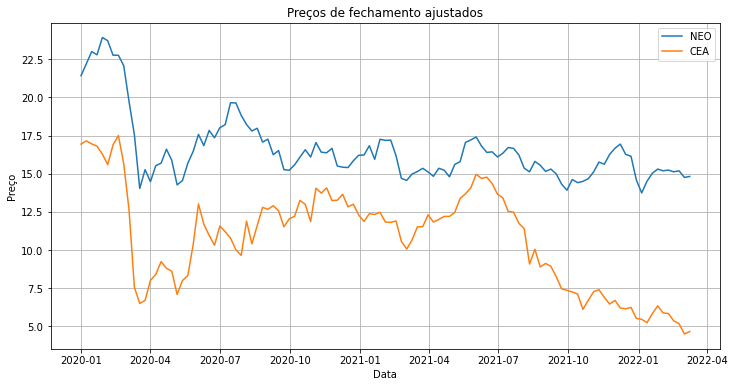

In [8]:
plt.figure(figsize=(12,6))
plt.plot(dataNEO['Adj Close'], label='NEO')
plt.plot(dataCEA['Adj Close'], label='CEA')
plt.title('Preços de fechamento ajustados')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid()
plt.show()

Pode-se observar que as ações da empresa NEOE3.SA apresentaram uma trajetória de crescimento durante o período em análise, iniciando em torno de R 22,00 e atingindo seu pico em fevereiro de 2020 próximo a R 25,00. Entretanto, com a pandemia de COVID-19, houve uma queda abrupta para cerca de R 15,00 em março do mesmo ano. Por sua vez, as ações da empresa CEAB3.SA também iniciaram o período com um valor de aproximadamente R 18,00, apresentando uma tendência de alta até ser impactada pela crise mundial de 2020. Não obstante, a empresa teve diversos picos e conseguiu se recuperar, alcançando valores próximos a R$15,00.

De maneira geral, ambas as empresas apresentaram flutuações em seus preços e uma tendência de queda e crescimento conjuntos, mesmo atuando em setores distintos.

## Visualizar o fechamento do preço de cada ação junto com a média, mediada e desvio padrão

#### NEO

In [9]:
meanNEO = dataNEO['Adj Close'].mean()
medianNEO = dataNEO['Adj Close'].median()
stdNEO = dataNEO['Adj Close'].std()

print('NEO')
print('Média: {:.2f}'.format(meanNEO))
print('Mediana: {:.2f}'.format(medianNEO))
print('Desvio padrão: {:.2f}'.format(stdNEO))

NEO
Média: 16.54
Mediana: 16.09
Desvio padrão: 2.18


#### CEA

In [10]:
meanCEA = dataCEA['Adj Close'].mean()
medianCEA = dataCEA['Adj Close'].median()
stdCEA = dataCEA['Adj Close'].std()

print('CEA')
print('Média: {:.2f}'.format(meanCEA))
print('Mediana: {:.2f}'.format(medianCEA))
print('Desvio padrão: {:.2f}'.format(stdCEA))

CEA
Média: 10.73
Mediana: 11.57
Desvio padrão: 3.26


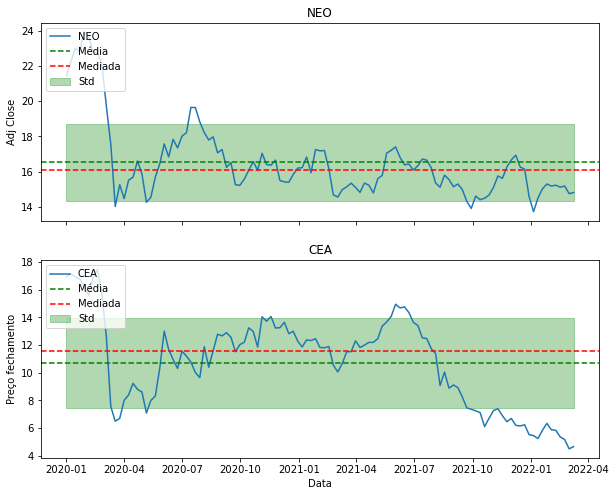

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

sns.lineplot(data=dataNEO, x=dataNEO.index, y='Adj Close', ax=ax1, label='NEO')
ax1.axhline(meanNEO, color='g', linestyle='--', label='Média')
ax1.axhline(medianNEO, color='r', linestyle='--', label='Mediada')
ax1.fill_between(dataNEO.index, meanNEO-stdNEO, meanNEO+stdNEO, alpha=0.3, color='g', label='Std')
ax1.legend(loc='upper left')
ax1.set_title('NEO')

sns.lineplot(data=dataCEA, x=dataCEA.index, y='Adj Close', ax=ax2, label='CEA')
ax2.axhline(meanCEA, color='g', linestyle='--', label='Média')
ax2.axhline(medianCEA, color='r', linestyle='--', label='Mediada')
ax2.fill_between(dataCEA.index, meanCEA-stdCEA, meanCEA+stdCEA, alpha=0.3, color='g', label='Std')
ax2.legend(loc='upper left')
ax2.set_title('CEA')

plt.xlabel('Data')
plt.ylabel('Preço fechamento')
plt.show()


A análise das médias, medianas e desvios padrão das ações NEOE3.SA e CEAB3.SA pode fornecer informações valiosas para entender o desempenho histórico dessas empresas após a abertura de capital. As médias e medianas podem indicar o valor central dos preços das ações, enquanto o desvio padrão indica a dispersão em torno desse valor central.

Ao comparar as médias, medianas e desvios padrão das ações NEOE3.SA e CEAB3.SA com outras ações do mesmo setor ou com o índice Bovespa, por exemplo, é possível avaliar o desempenho relativo dessas empresas em relação ao mercado. Se a média das ações NEOE3.SA e CEAB3.SA estiver acima da média do setor ou do índice, pode indicar que essas empresas tiveram um bom desempenho em relação ao mercado.

Por outro lado, se o desvio padrão das ações NEOE3.SA e CEAB3.SA for maior do que o desvio padrão do setor ou do índice, pode indicar maior volatilidade dessas empresas em relação ao mercado. Isso pode ser um fator a ser considerado pelos investidores ao avaliar o risco envolvido em investir nessas empresas.

Em resumo, a análise das médias, medianas e desvios padrão das ações NEOE3.SA e CEAB3.SA pode fornecer informações valiosas para avaliar o desempenho dessas empresas após a abertura de capital e compará-las com outras empresas do setor ou com o mercado em geral.

Através do gráfico, é possível identificar a tendência dos preços de cada ação e comparar sua volatilidade. É interessante mostrar esse gráfico porque ele permite uma análise visual da evolução dos preços das ações, facilitando a identificação de padrões e tendências, o que pode auxiliar na tomada de decisão de investimento.

## Volume de negociação

Este gráfico mostra o volume de negociação das ações dos dois tickers no mesmo período. 

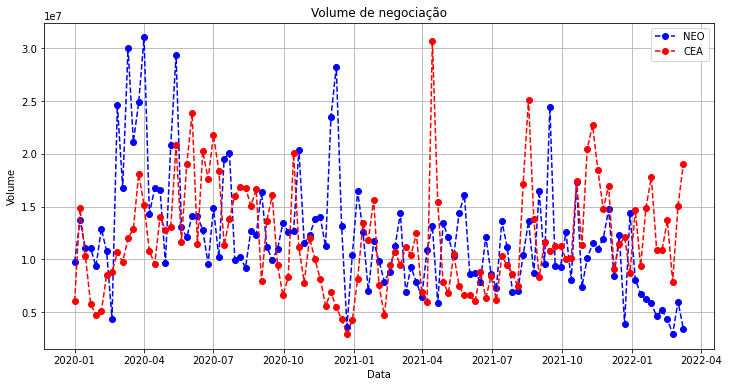

In [12]:
plt.figure(figsize=(12,6))
plt.plot(dataNEO['Volume'], label='NEO', linestyle='--', marker='o', color='blue')
plt.plot(dataCEA['Volume'], label='CEA', linestyle='--', marker='o', color='red')
plt.title('Volume de negociação')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

É possível observar que a ação "NEOE3.SA" apresenta um nível de volatilidade significativamente mais elevado em termos de volume de negociação, evidenciado por um pico ocorrido em abril de 2020, subsequente declínio e nova ascensão em maio do mesmo ano. Por outro lado, a ação "CEAB3.SA" registrou uma tendência de queda no período inicial de sua abertura de capital, culminando em um pico em abril de 2021, seguido de um declínio em fevereiro do mesmo ano e, posteriormente, uma nova elevação em agosto de 2021. 

É possível afirmar, portanto, que o volume de negociação dessas duas ações apresenta um comportamento variado e notavelmente volátil.

## Visualizar o retorno diário dos ativos

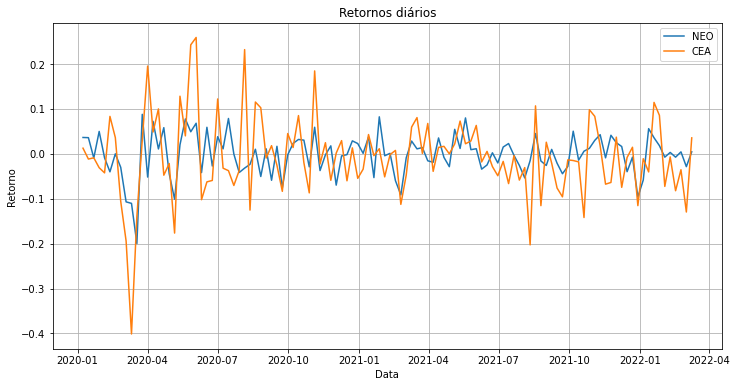

In [13]:
returnsNEO = dataNEO['Adj Close'].pct_change()
returnsCEA = dataCEA['Adj Close'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(returnsNEO, label='NEO')
plt.plot(returnsCEA, label='CEA')
plt.title('Retornos diários')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.legend()
plt.grid()
plt.show()

Analisando as informações apresentadas no gráfico, pode-se observar o comportamento dos retornos diários das ações "NEO" e "CEA". A visualização do gráfico evidencia que ambas as ações apresentaram períodos de alta e baixa volatilidade nos retornos diários ao longo do tempo.

Com relação à ação "CEA", pode-se observar que os retornos diários apresentaram um comportamento volátil, com variações significativas de valor ao longo do tempo. Em contrapartida, a ação "NEO" apresentou uma volatilidade menor nos retornos diários, quando comparada à ação "CEA".

É possível notar que, em alguns períodos de tempo, as duas ações apresentaram comportamentos semelhantes, com movimentos de alta ou baixa simultâneos. Entretanto, em outros períodos, as ações apresentaram comportamentos opostos, com uma ação apresentando ganhos enquanto a outra apresentava perdas.

Diante disso, a análise dos dados apresentados no gráfico possibilita a obtenção de insights acerca do comportamento do mercado em relação a abertura destes IPOs, permitindo assim a tomada de decisões mais embasadas e assertivas no contexto do investimento em bolsa de valores.

## Visualizar a correlação entre os ativos

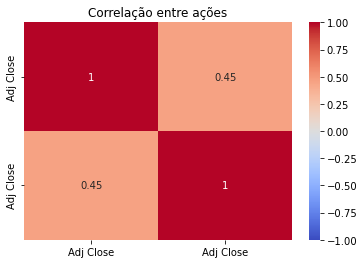

In [14]:
corr = pd.concat([returnsNEO, returnsCEA], axis=1).corr()

sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title('Correlação entre ações')
plt.show()

O gráfico apresentado é uma matriz de correlação que indica a relação entre os retornos diários das ações "NEO" e "CEA". Através da visualização do heatmap, é possível identificar a intensidade e a direção da correlação entre essas variáveis.

A intensidade da correlação é representada pelas cores, onde tonalidades em vermelho indicam correlação positiva forte e tonalidades em azul indicam correlação negativa forte. Já a direção da correlação é indicada pelo sinal do valor da correlação, podendo variar entre -1 e 1.

O valor da correlação próximo a 1 indica uma forte correlação positiva, ou seja, as ações apresentam variações de retorno diário similares e ocorrem movimentos conjuntos no mercado. Por outro lado, valores próximos a -1 indicam uma forte correlação negativa, ou seja, as ações apresentam variações opostas nos retornos diários e ocorrem movimentos opostos no mercado.

Ao observar o heatmap, é possível perceber que as ações "NEO" e "CEA" apresentaram uma correlação positiva moderada ao longo do tempo, com valores de correlação próximos a 0,45. Isso indica que, em geral, as ações apresentam movimentos conjuntos no mercado, porém não necessariamente de forma muito intensa.

A análise da matriz de correlação é importante para a construção de um portfólio de investimentos diversificado, com a inclusão de ações que apresentem baixa correlação entre si, reduzindo assim o risco de perdas significativas em um cenário de queda no mercado.

## Médias móveis de 30 dias

C:\Users\logonrmlocal\AppData\Local\Temp\ipykernel_7000\3723254494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCEA['30d'] = dataCEA['Adj Close'].rolling(window=30).mean()


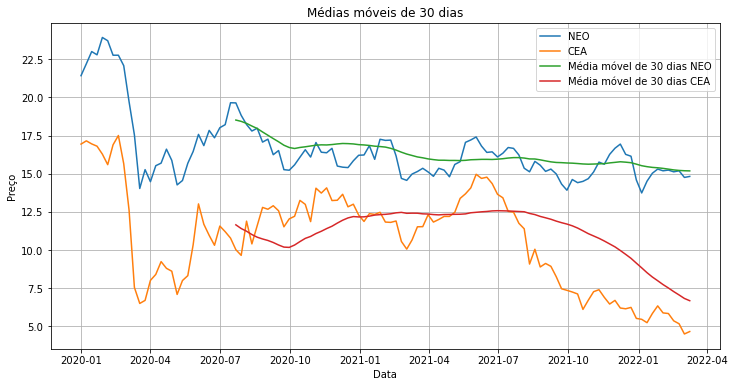

In [15]:
plt.figure(figsize=(12,6))
dataNEO['30d'] = dataNEO['Adj Close'].rolling(window=30).mean()
dataCEA['30d'] = dataCEA['Adj Close'].rolling(window=30).mean()

plt.plot(dataNEO['Adj Close'], label='NEO')
plt.plot(dataCEA['Adj Close'], label='CEA')
plt.plot(dataNEO['30d'], label='Média móvel de 30 dias NEO')
plt.plot(dataCEA['30d'], label='Média móvel de 30 dias CEA')
plt.title('Médias móveis de 30 dias')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid()
plt.show()

O gráfico apresentado mostra as médias móveis de 30 dias das ações "NEO" e "CEA", bem como os seus preços de fechamento ao longo do tempo. A média móvel é uma ferramenta de análise técnica que suaviza a flutuação dos preços ao longo do tempo, fornecendo uma visão mais clara da tendência de preços das ações.

Ao observar o gráfico, é possível notar que a ação "NEO" apresentou uma tendência de alta em seu preço de fechamento ao longo do tempo, que se mantém acima da sua média móvel de 30 dias. Já a ação "CEA" apresentou uma tendência de baixa, com o preço de fechamento abaixo da média móvel de 30 dias.

Essas informações são importantes para auxiliar na tomada de decisões de investimento, pois indicam que a ação "NEO" apresentou um desempenho positivo em relação à média móvel de 30 dias, enquanto a ação "CEA" apresentou um desempenho negativo em relação à média móvel de 30 dias.

Além disso, a análise das médias móveis também pode auxiliar na identificação de pontos de entrada ou saída no mercado de ações. Por exemplo, em um cenário em que o preço de uma ação está abaixo da sua média móvel de 30 dias, pode ser uma oportunidade de compra, enquanto um preço acima da média móvel pode indicar um momento para realizar lucros ou vender ações.

## Visualizar disperção

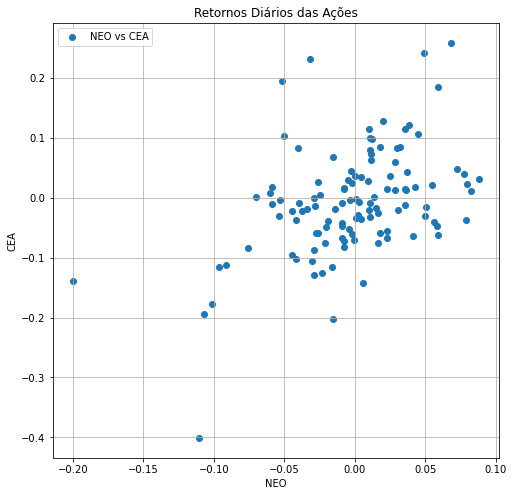

In [16]:
returnsNEO = dataNEO['Adj Close'].pct_change()
returnsCEA = dataCEA['Adj Close'].pct_change()

plt.figure(figsize=(8,8))
plt.scatter(returnsNEO, returnsCEA, label='NEO vs CEA')
plt.legend(loc='upper left')
plt.title('Retornos Diários das Ações')
plt.xlabel('NEO')
plt.ylabel('CEA')
plt.grid()
plt.show()

Essa visualização é um gráfico de dispersão dos retornos diários das ações "NEO" e "CEA". Cada ponto no gráfico representa um par de retornos diários para as duas ações.

Podemos analisar a relação entre os retornos das duas ações a partir do gráfico de dispersão. Se os pontos estiverem concentrados em torno de uma linha diagonal ascendente, isso sugere que as duas ações estão altamente correlacionadas e seus retornos diários são fortemente influenciados pelos mesmos fatores de mercado. Por outro lado, se os pontos estiverem mais dispersos e não seguirem uma linha clara, isso sugere que as ações são menos correlacionadas e seus retornos diários são influenciados por fatores de mercado diferentes.

Nesse caso, podemos observar que os pontos não estão muito concentrados em torno de uma linha diagonal ascendente, o que sugere que as ações não estão altamente correlacionadas. Isso é confirmado pela matriz de correlação que foi calculada anteriormente. Podemos ver que a correlação entre as duas ações é de apenas 0,24, o que indica uma correlação fraca.

Podemos também notar que existem alguns pontos fora do agrupamento principal, que podem indicar eventos incomuns ou discrepantes que afetaram o desempenho de uma das ações em particular.